# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [144]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [145]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [146]:
# Your code here:

# Check headers 
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [147]:
# Check data types and NaNs 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [148]:
# Check descriptive statistics 
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Figure size 1440x720 with 0 Axes>

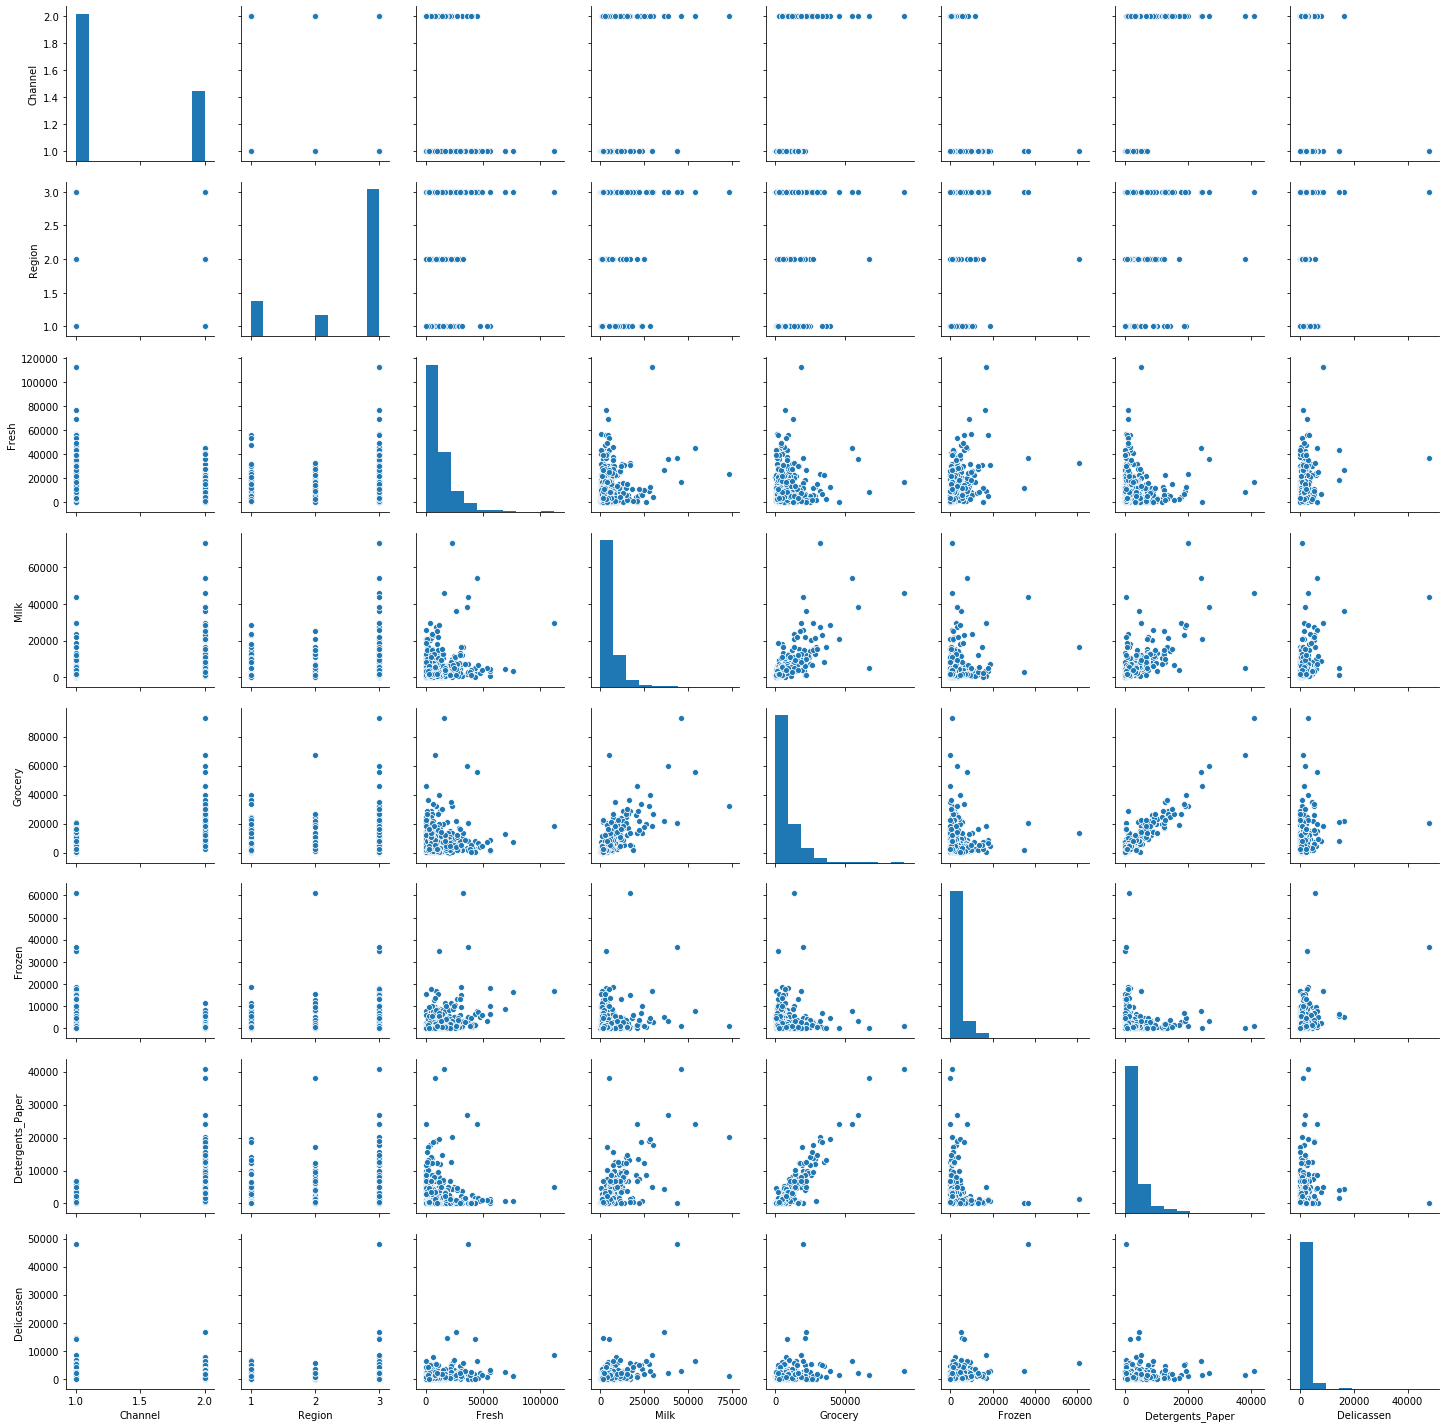

In [149]:
# Check category distribution with pairplot
plt.figure(figsize=(20,10))
sns.pairplot(customers)
plt.show()


In [150]:
# Check unique values in categorical feature Channel
customers.Channel.unique()

array([2, 1], dtype=int64)

In [151]:
# Check unique values in categorical feature Region
customers.Region.unique()

array([3, 1, 2], dtype=int64)

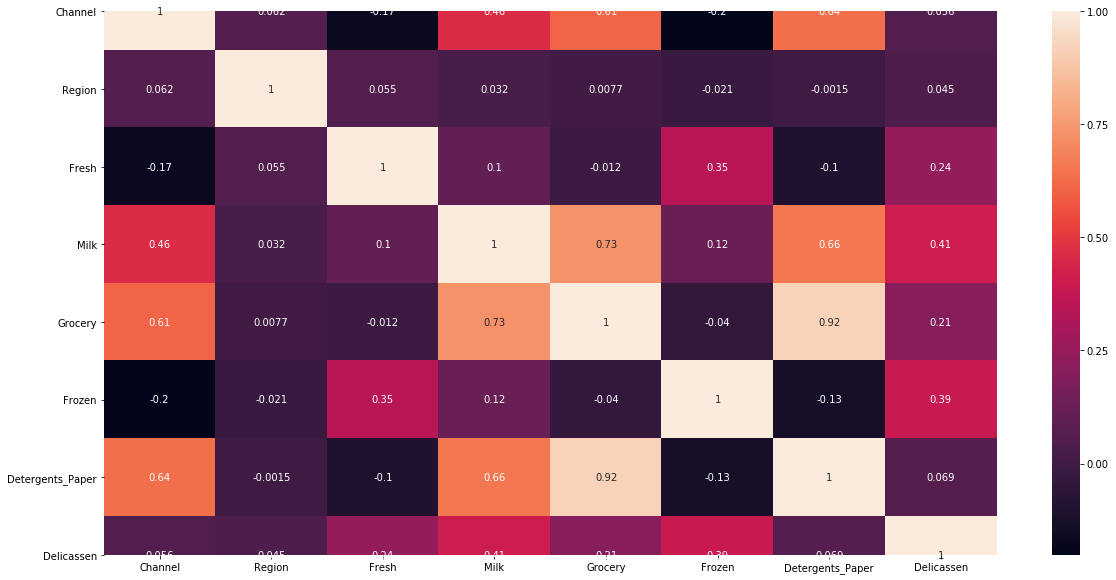

In [152]:
##Check colinearity
plt.figure(figsize=(20,10))
sns.heatmap(customers.corr(), annot=True)
plt.show()

In [153]:
# Your observations here
'''
The dataset includes 8 features. Regions contains information on the user living location. Channel contains information on the
user shopping channel. The rest of the columns include information on the user spending on different shopping categories.

The data is clean and complete. The datatypes are correct, however, Channel and Region should be converted as they stand for
categorical data.

All expenses distributions are skewed to the left, meaning that there are a lot of customers making small purchases and few
spending a lot of money on a purchase. The distribution of the region values indicates that there is a majority of the dataset
categorized under the label "Other"

There are outliers as the amounts spent when shopping can reach extremes (i.e.: one customer can buy a single pear and another
one can buy meat and vegetables for a month). Since we are trying to estimate customer behaviour according to their
expenses, it seems incorrect to remove this information as soon as we know that it is probably correct. However, if needed,
a possible option would be removing the lower outliers, as the analysis will probably focus more on identifying the clients
with greater expenses.

There are two features that present a high colinearity: Grocery and detergents_paper. We could remove "detergents_paper" as that 
category presents slightly more colinearity with the other features than "grocery"

'''

'\nThe dataset includes 8 features. Regions contains information on the user living location. Channel contains information on the\nuser shopping channel. The rest of the columns include information on the user spending on different shopping categories.\n\nThe data is clean and complete. The datatypes are correct, however, Channel and Region should be converted as they stand for\ncategorical data.\n\nAll expenses distributions are skewed to the left, meaning that there are a lot of customers making small purchases and few\nspending a lot of money on a purchase. The distribution of the region values indicates that there is a majority of the dataset\ncategorized under the label "Other"\n\nThere are outliers as the amounts spent when shopping can reach extremes (i.e.: one customer can buy a single pear and another\none can buy meat and vegetables for a month). Since we are trying to estimate customer behaviour according to their\nexpenses, it seems incorrect to remove this information as s

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [154]:
# Your code here

# Transform categorical features to boolean
customers_dummies = pd.get_dummies(customers[['Channel', 'Region']].astype(str))
customers = customers.join(customers_dummies)
customers.drop(['Channel', 'Region'], axis=1, inplace=True)
customers

#Remove redundant category
# customers_clean = customers.drop(['Detergents_Paper'], axis=1)
customers_clean = customers.copy()


In [155]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [156]:
# Your code here:
##Standardize data using Standard Scaler:
'''
The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X
before applying machine learning techniques. StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!)
so that each column/feature/variable will have mean = 0 and standard deviation = 1.
'''

sc=StandardScaler()
customers_scale = sc.fit_transform(customers_clean)


In [157]:
customers_clean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,39228,1431,764,4510,93,2346,1,0,0,0,1
437,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,10290,1981,2232,1038,168,2125,1,0,0,0,1


In [158]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , ..., -0.46056619,
        -0.34582203,  0.62642243],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.13538389, -0.51753572, -0.60251388, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.72930698, -0.5559243 , -0.57322717, ..., -0.46056619,
        -0.34582203,  0.62642243]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [173]:
# Your code here:

kmeans = KMeans(n_clusters=4).fit(customers_scale)
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [174]:
# Your code here:
customers['labels'].value_counts()

3    210
1    119
2     65
0     46
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [175]:
# Your code here
dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [176]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

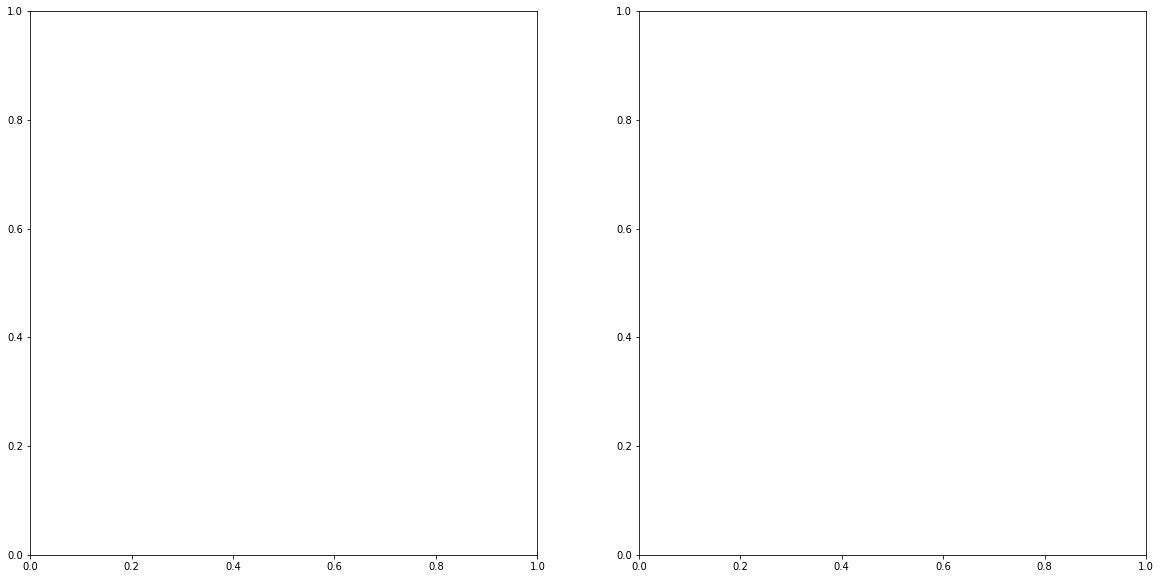

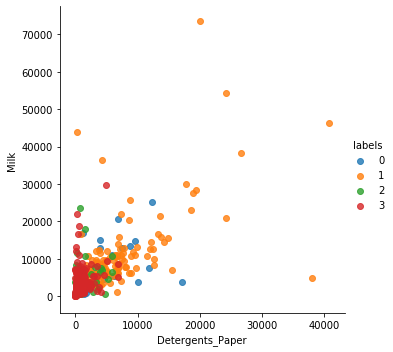

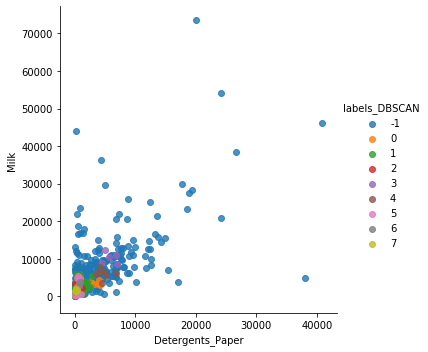

In [177]:
# Your code here:

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0] = sns.lmplot(x = 'Detergents_Paper', y = 'Milk', data=customers, hue='labels', fit_reg=False)
ax[1] = sns.lmplot(x = 'Detergents_Paper', y = 'Milk', data=customers, hue='labels_DBSCAN', fit_reg=False)


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

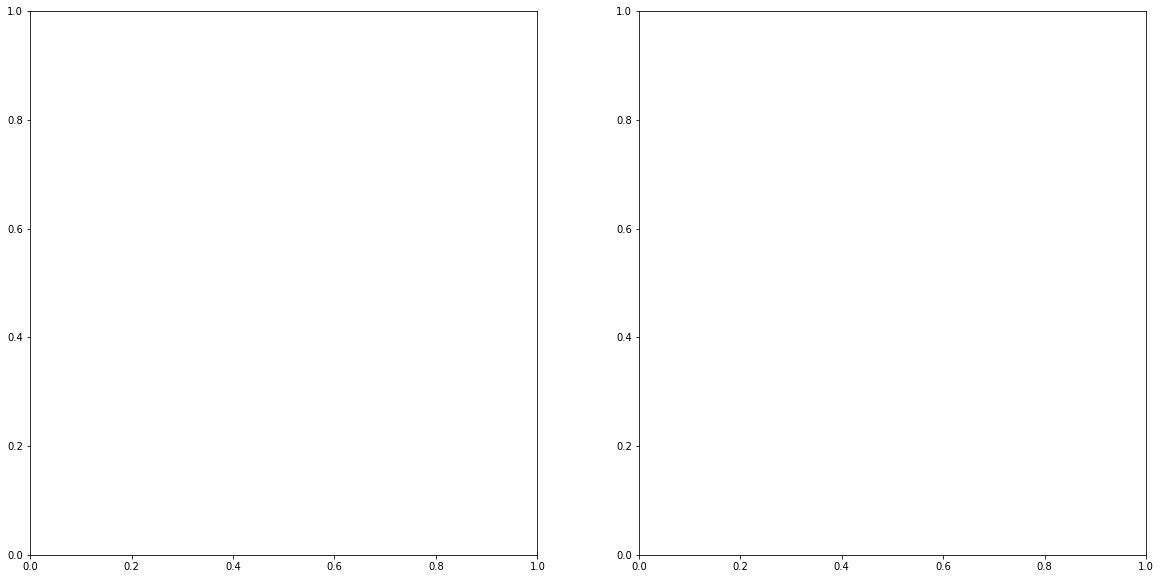

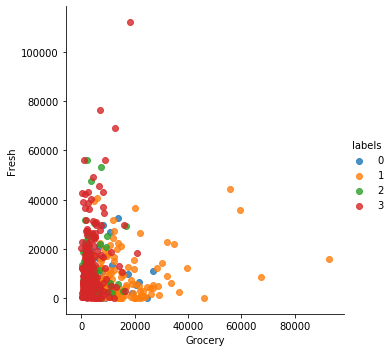

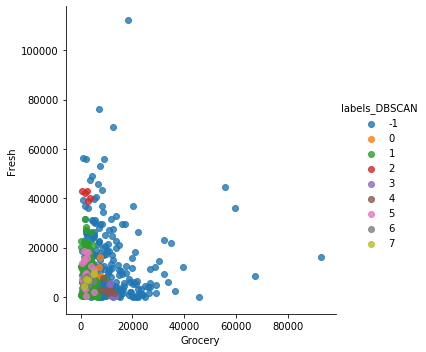

In [178]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0] = sns.lmplot(x = 'Grocery', y = 'Fresh', data=customers, hue='labels', fit_reg=False)
ax[1] = sns.lmplot(x = 'Grocery', y = 'Fresh', data=customers, hue='labels_DBSCAN', fit_reg=False)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

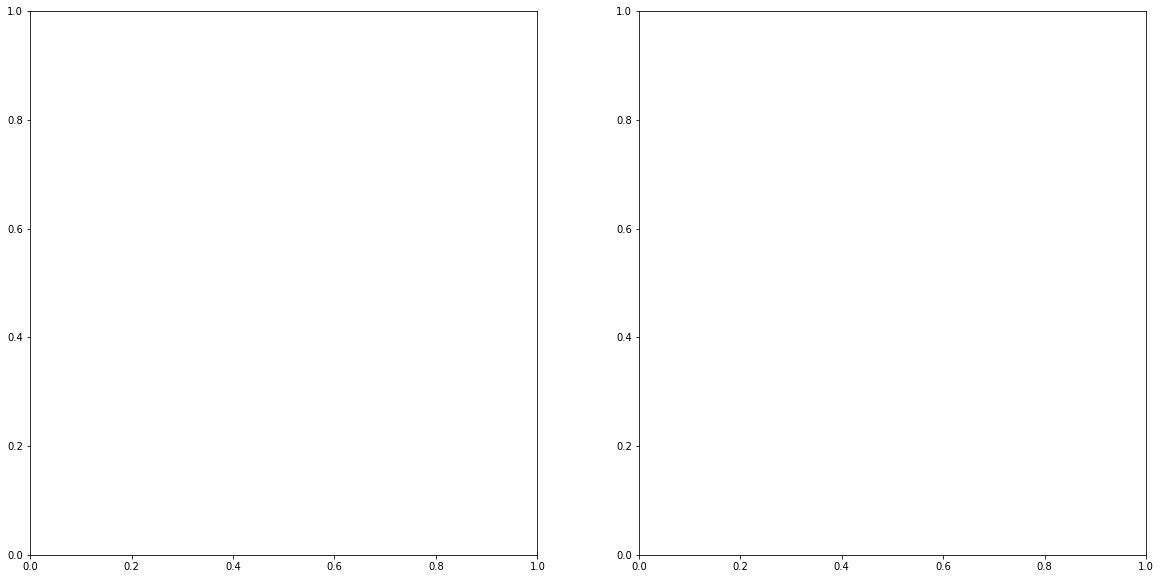

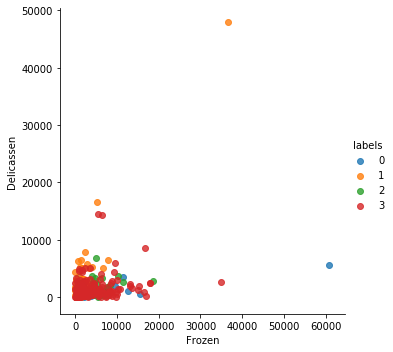

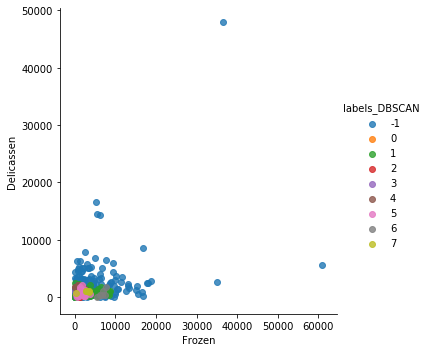

In [179]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0] = sns.lmplot(x = 'Frozen', y = 'Delicassen', data=customers, hue='labels', fit_reg=False)
ax[1] = sns.lmplot(x = 'Frozen', y = 'Delicassen', data=customers, hue='labels_DBSCAN', fit_reg=False)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [180]:
# Your code here:
Kmeans_mean = customers.groupby('labels').mean()
Kmeans_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels_DBSCAN
labels,,,,,,,,,,,,
0,9916.434783,5090.521739,7956.000000,4130.456522,2939.326087,1158.500000,0.608696,0.391304,0.00000,1.000000,0.000000,-0.130435
1,9490.302521,11455.680672,17203.168067,1860.394958,7486.705882,2245.176471,0.008403,0.991597,0.10084,0.008403,0.890756,-0.495798
2,12357.030769,4017.907692,4391.969231,3156.769231,1168.907692,1200.938462,0.907692,0.092308,1.00000,0.000000,0.000000,1.676923
3,13768.676190,3294.300000,3809.195238,3500.342857,789.290476,1297.214286,1.000000,0.000000,0.00000,0.000000,1.000000,0.309524


In [181]:
dbscan_mean = customers.groupby('labels_DBSCAN').mean()
dbscan_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels
labels_DBSCAN,,,,,,,,,,,,
-1,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.509804,0.490196,0.192157,0.164706,0.643137,1.572549
0,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
1,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
3,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
4,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
5,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
6,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
7,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here